In [2]:
import pandas as pd
import numpy as np

experiments = ['p10', 'p8', 'p6', 'p4', 'p2', 'p0']
seeds = [f's{i}' for i in range(1, 11)]
specialists_mean = {}
specialists = pd.DataFrame()

for experiment in experiments:
    specialist_data = f'../../datalake/wcci/{experiment}/data/xdpole/main_manager/main_stats'
    specialist_mean = []
    specialist_score = []
    for seed in seeds:
        df = pd.read_csv(f'{specialist_data}/{seed}_run.csv')
        specialist_mean.append(
            df.specialist_score.mean()
        )
        specialist_score.append(
            list(df.specialist_score)
        )
        df["experiment"] = experiment
        df["seed"] = seed
        specialists = pd.concat([specialists, df], ignore_index=True)
    specialists_mean[experiment] = specialist_mean

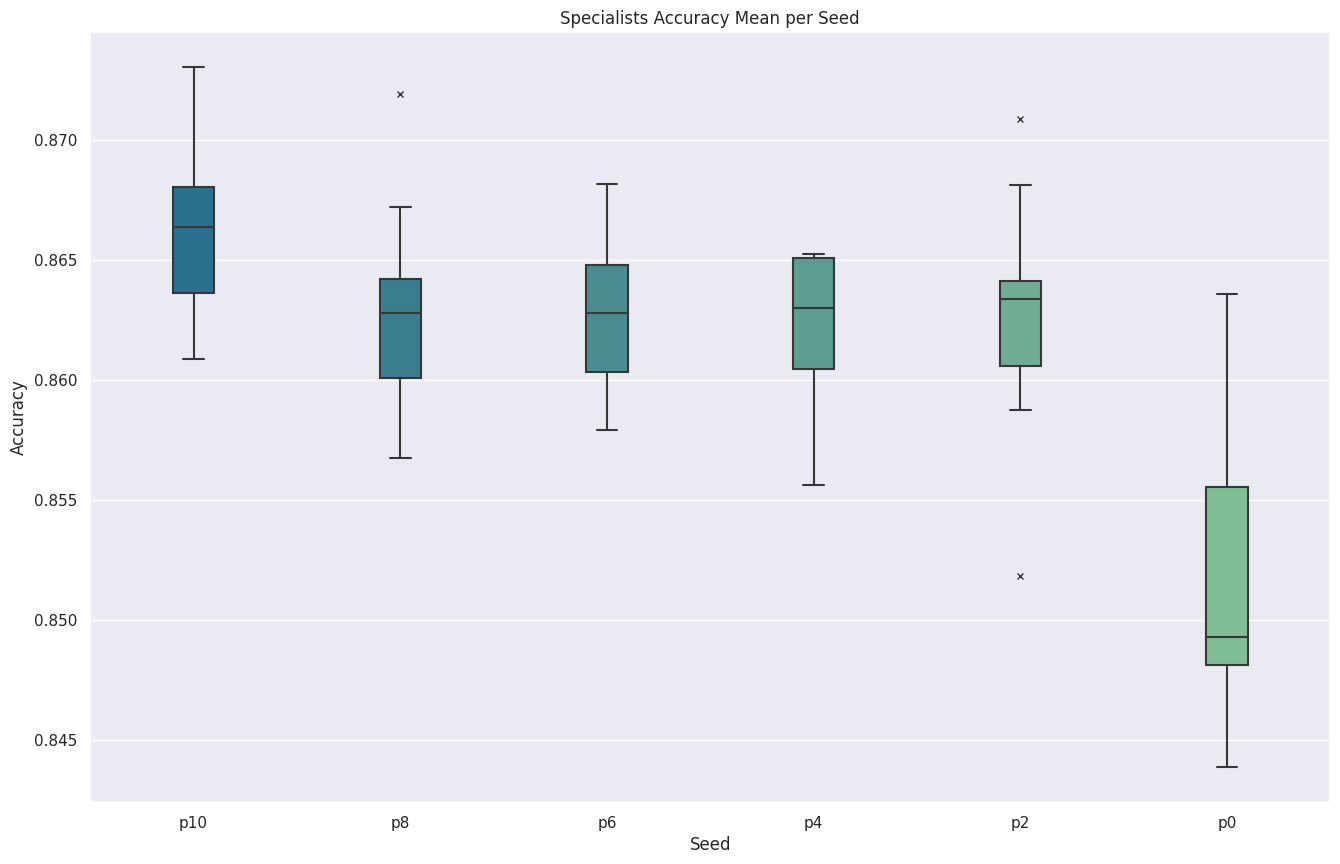

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize':(16,10)})

palette = 'blend:#1a759f,#76c893'
df = pd.DataFrame(specialists_mean)
sns.boxplot(df, flierprops={"marker": "x"}, width=0.2, palette=palette)
plt.title(f"Specialists Accuracy Mean per Seed")
plt.ylabel("Accuracy")
plt.xlabel("Seed")
plt.show()

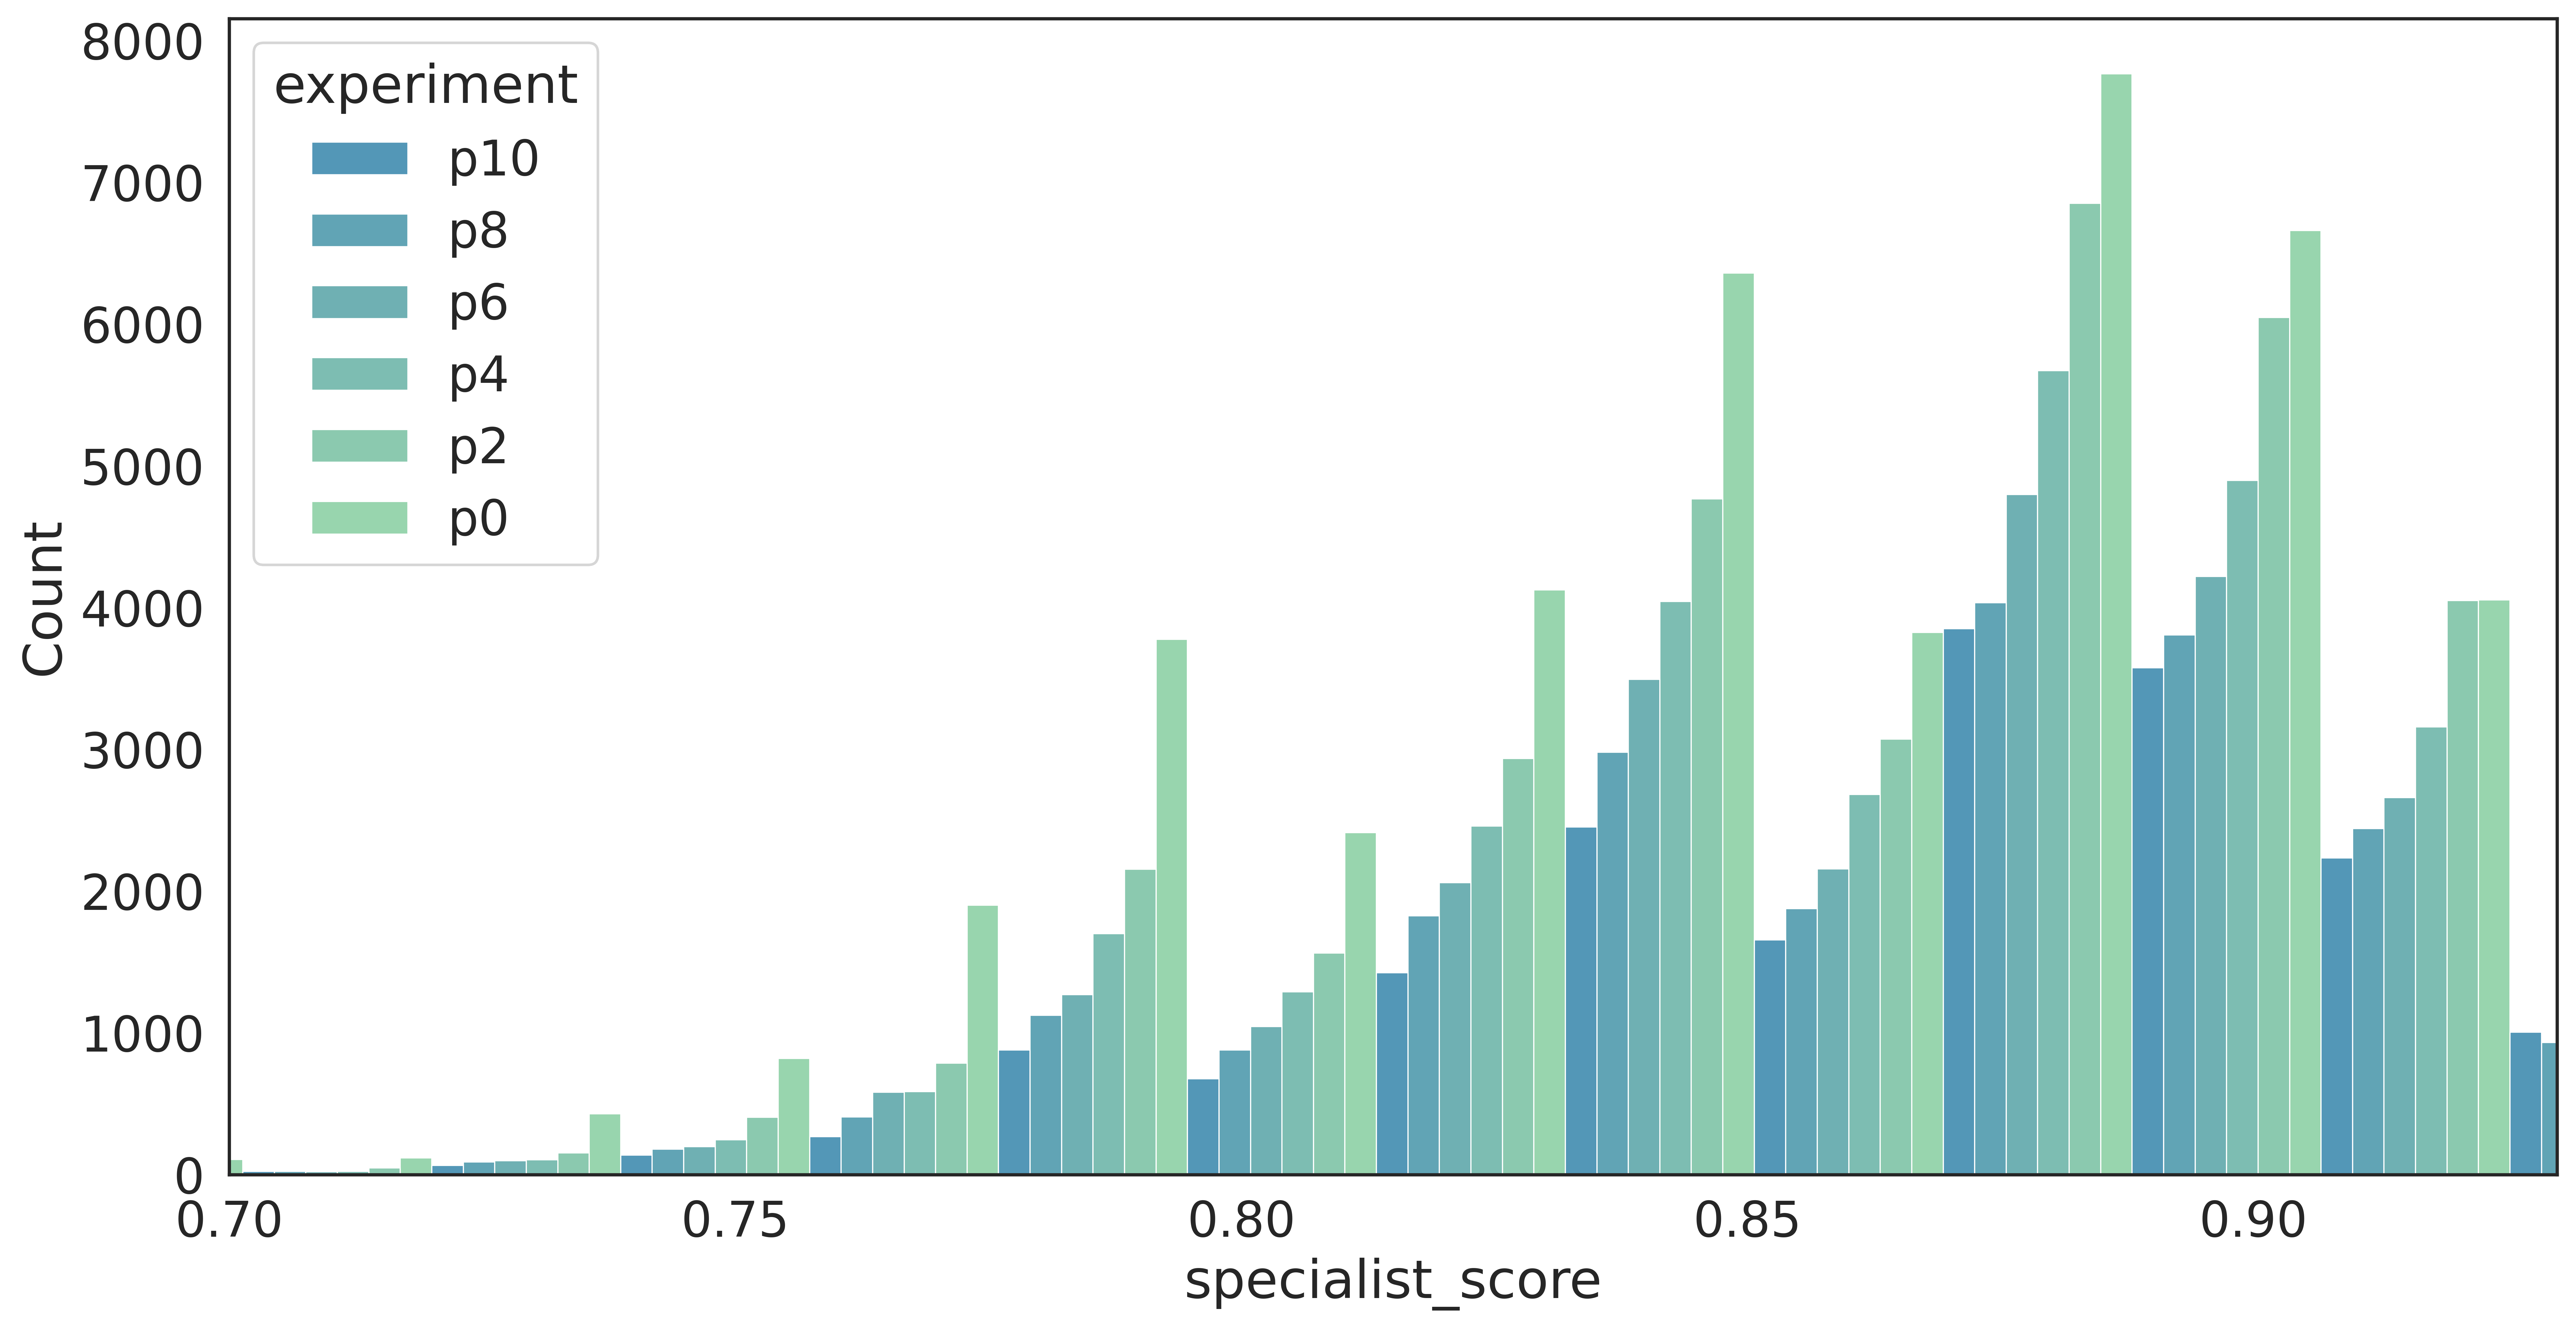

In [4]:
sns.set_theme()
sns.set(rc={'figure.figsize':(16,8)}, font_scale=1.7, style='white')

plt.figure(dpi=600)
palette = 'blend:#1a759f,#76c893'
sns.histplot(
    specialists,
    x="specialist_score",
    hue="experiment",
    bins=30,
    palette=palette,
    multiple="dodge",
)
plt.xlim([0.7, 0.93])
plt.show()

In [8]:
def metrics(df, experiment):
    data = df.query(f"experiment == '{experiment}'")
    r, p = [], []
    for i in range(len(data)):
        row = data.iloc[i]
        if row.specialist_score > 0:
            tp = int(row.specialist_tp)
            fn = int(row.specialist_fn)
            fp = int(row.specialist_fp)
            r.append(tp/(tp+fn))
            p.append(tp/(tp+fp))
        else:
            r.append(None)
            p.append(None)

    data['recall'] = r
    data['precision'] = p
    data['accuracy'] = data.specialist_score
    return data

metrics_data = pd.DataFrame()

for experiment in experiments:
    df = metrics(specialists, experiment)
    metrics_data = pd.concat([metrics_data, df[["gen", "experiment", "recall", "precision", "accuracy"]]])    

metrics_data

/tmp/ipykernel_82623/2308678772.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recall'] = r
/tmp/ipykernel_82623/2308678772.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['precision'] = p
/tmp/ipykernel_82623/2308678772.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,gen,experiment,recall,precision,accuracy
0,1000,p10,NaN,NaN,NaN
1,1001,p10,NaN,NaN,NaN
2,1002,p10,NaN,NaN,NaN
3,1003,p10,0.277778,0.625000,0.52
4,1004,p10,0.277778,0.625000,0.52
...,...,...,...,...,...
172877,5538,p0,0.867647,1.000000,0.91
172878,5539,p0,0.842857,0.983333,0.88
172879,5540,p0,0.870130,0.985294,0.89
172880,5541,p0,0.849315,1.000000,0.89


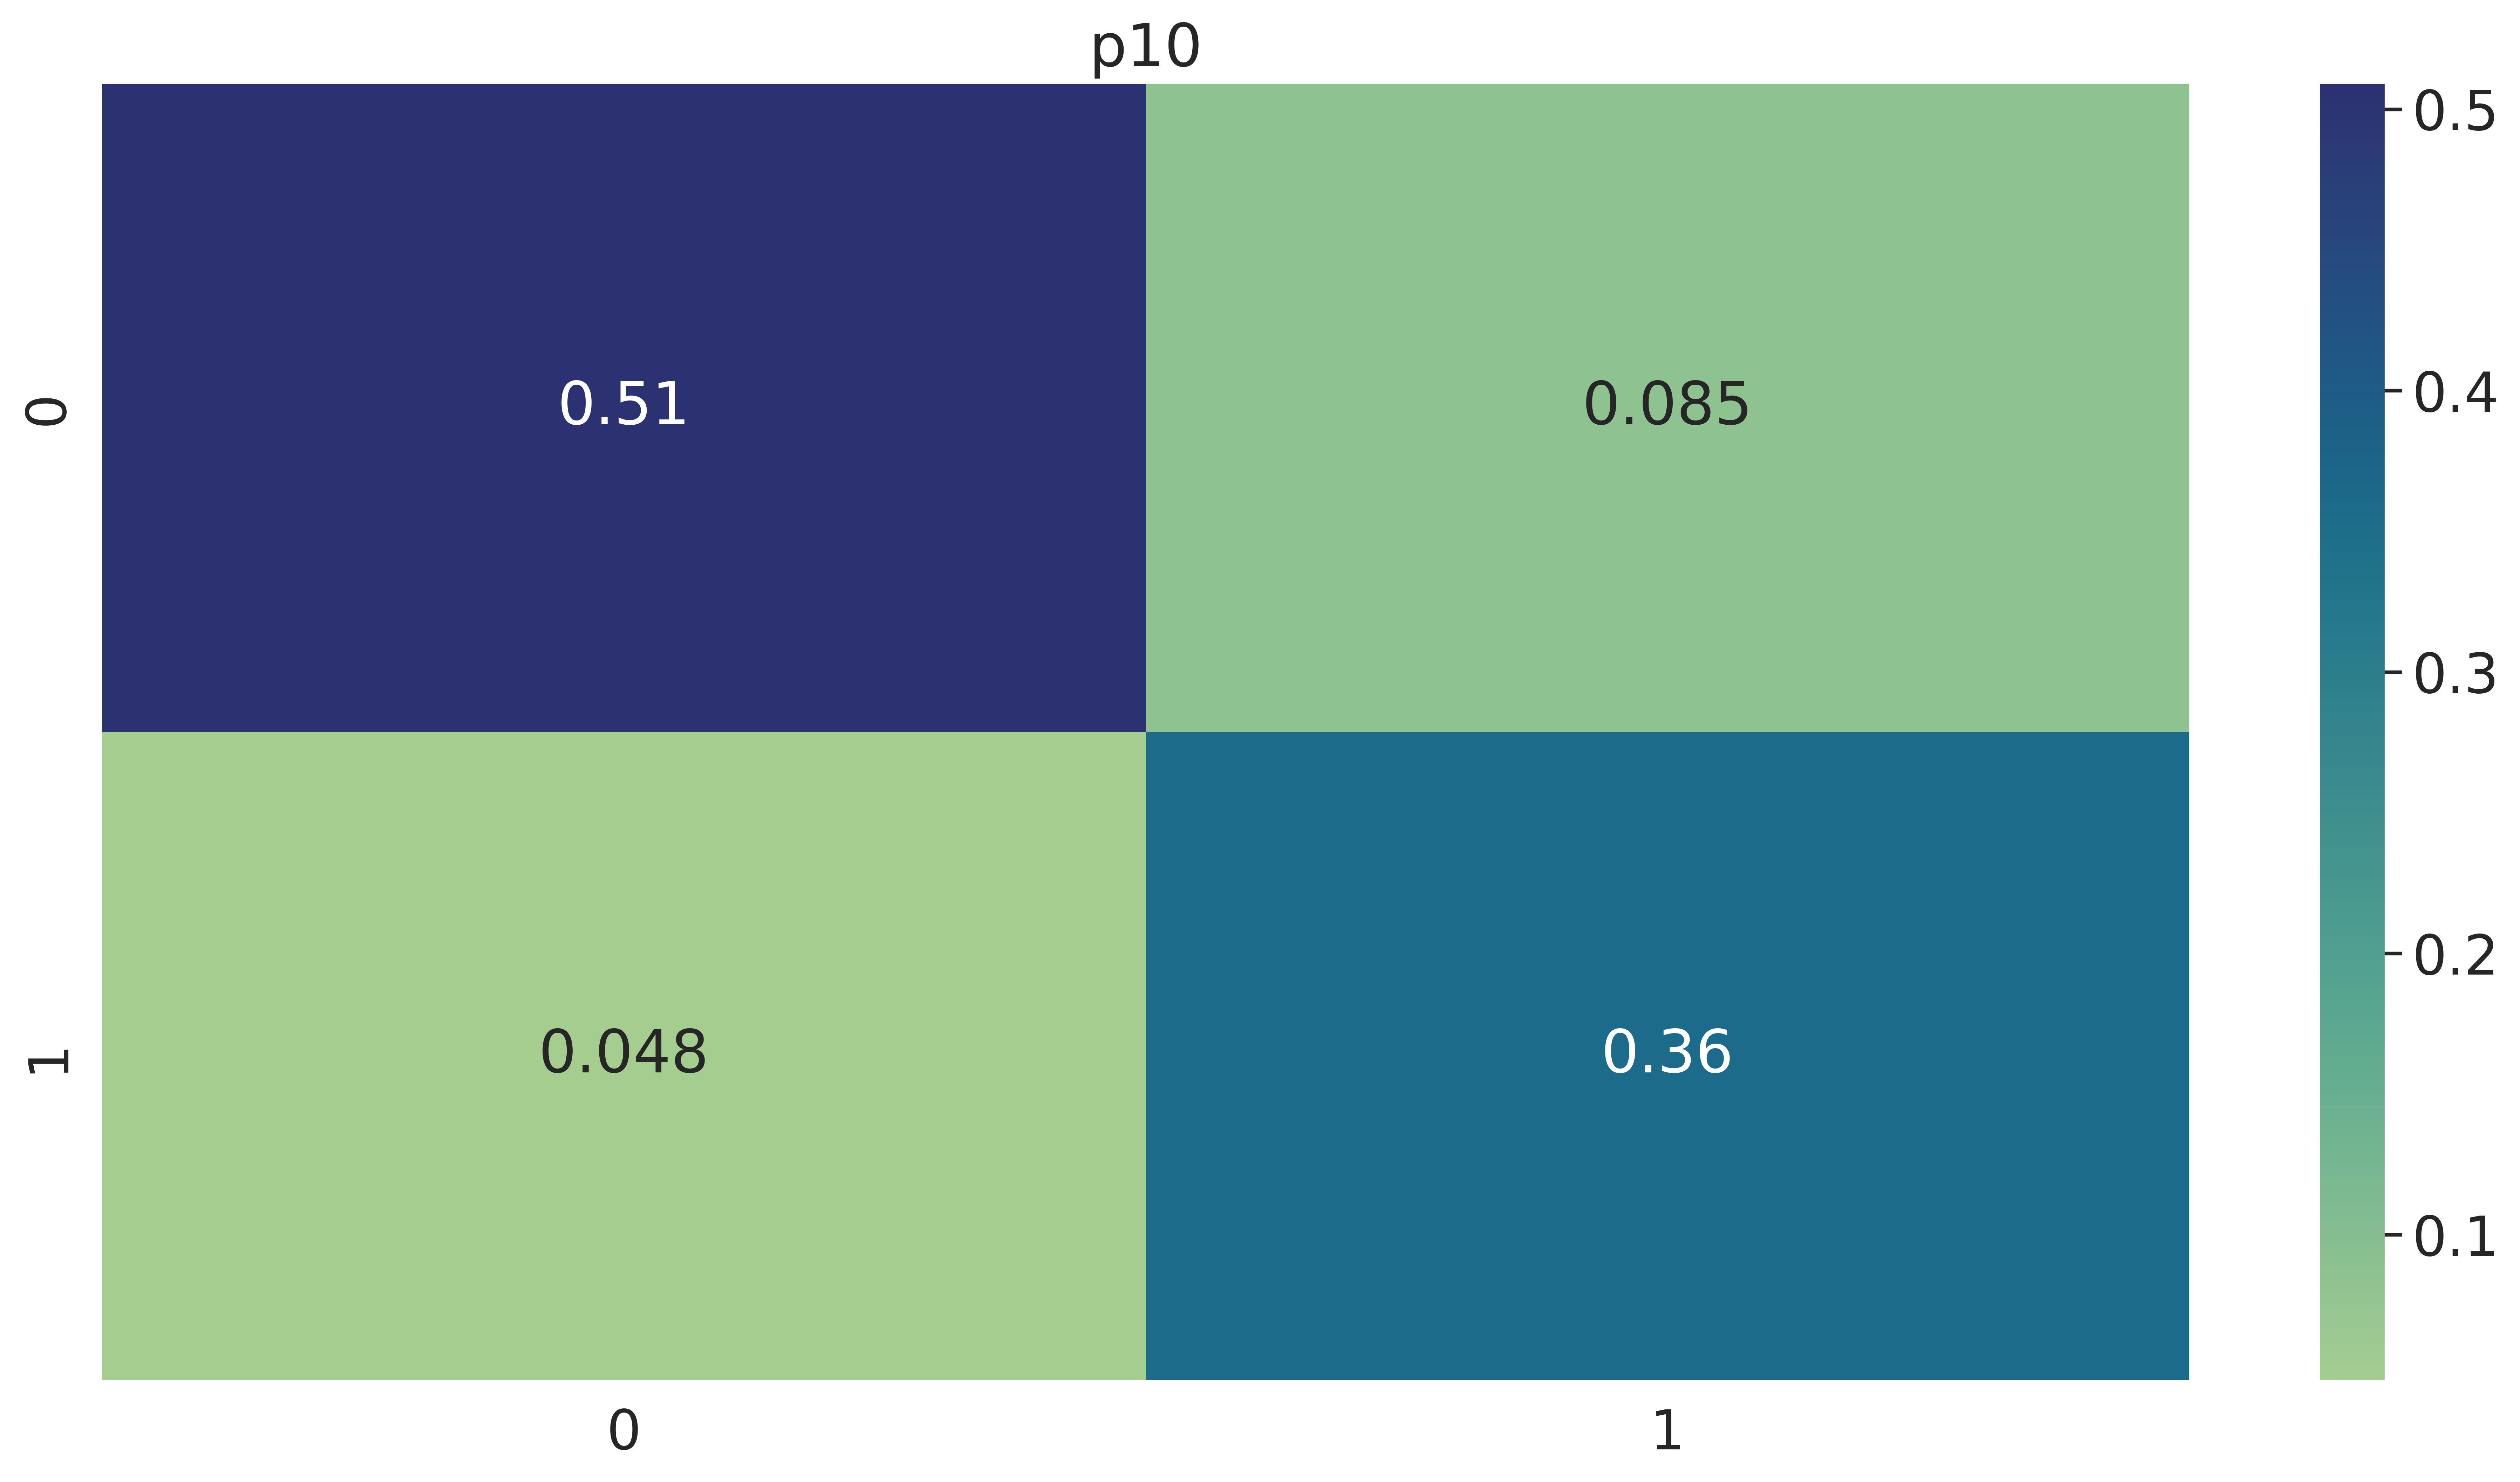

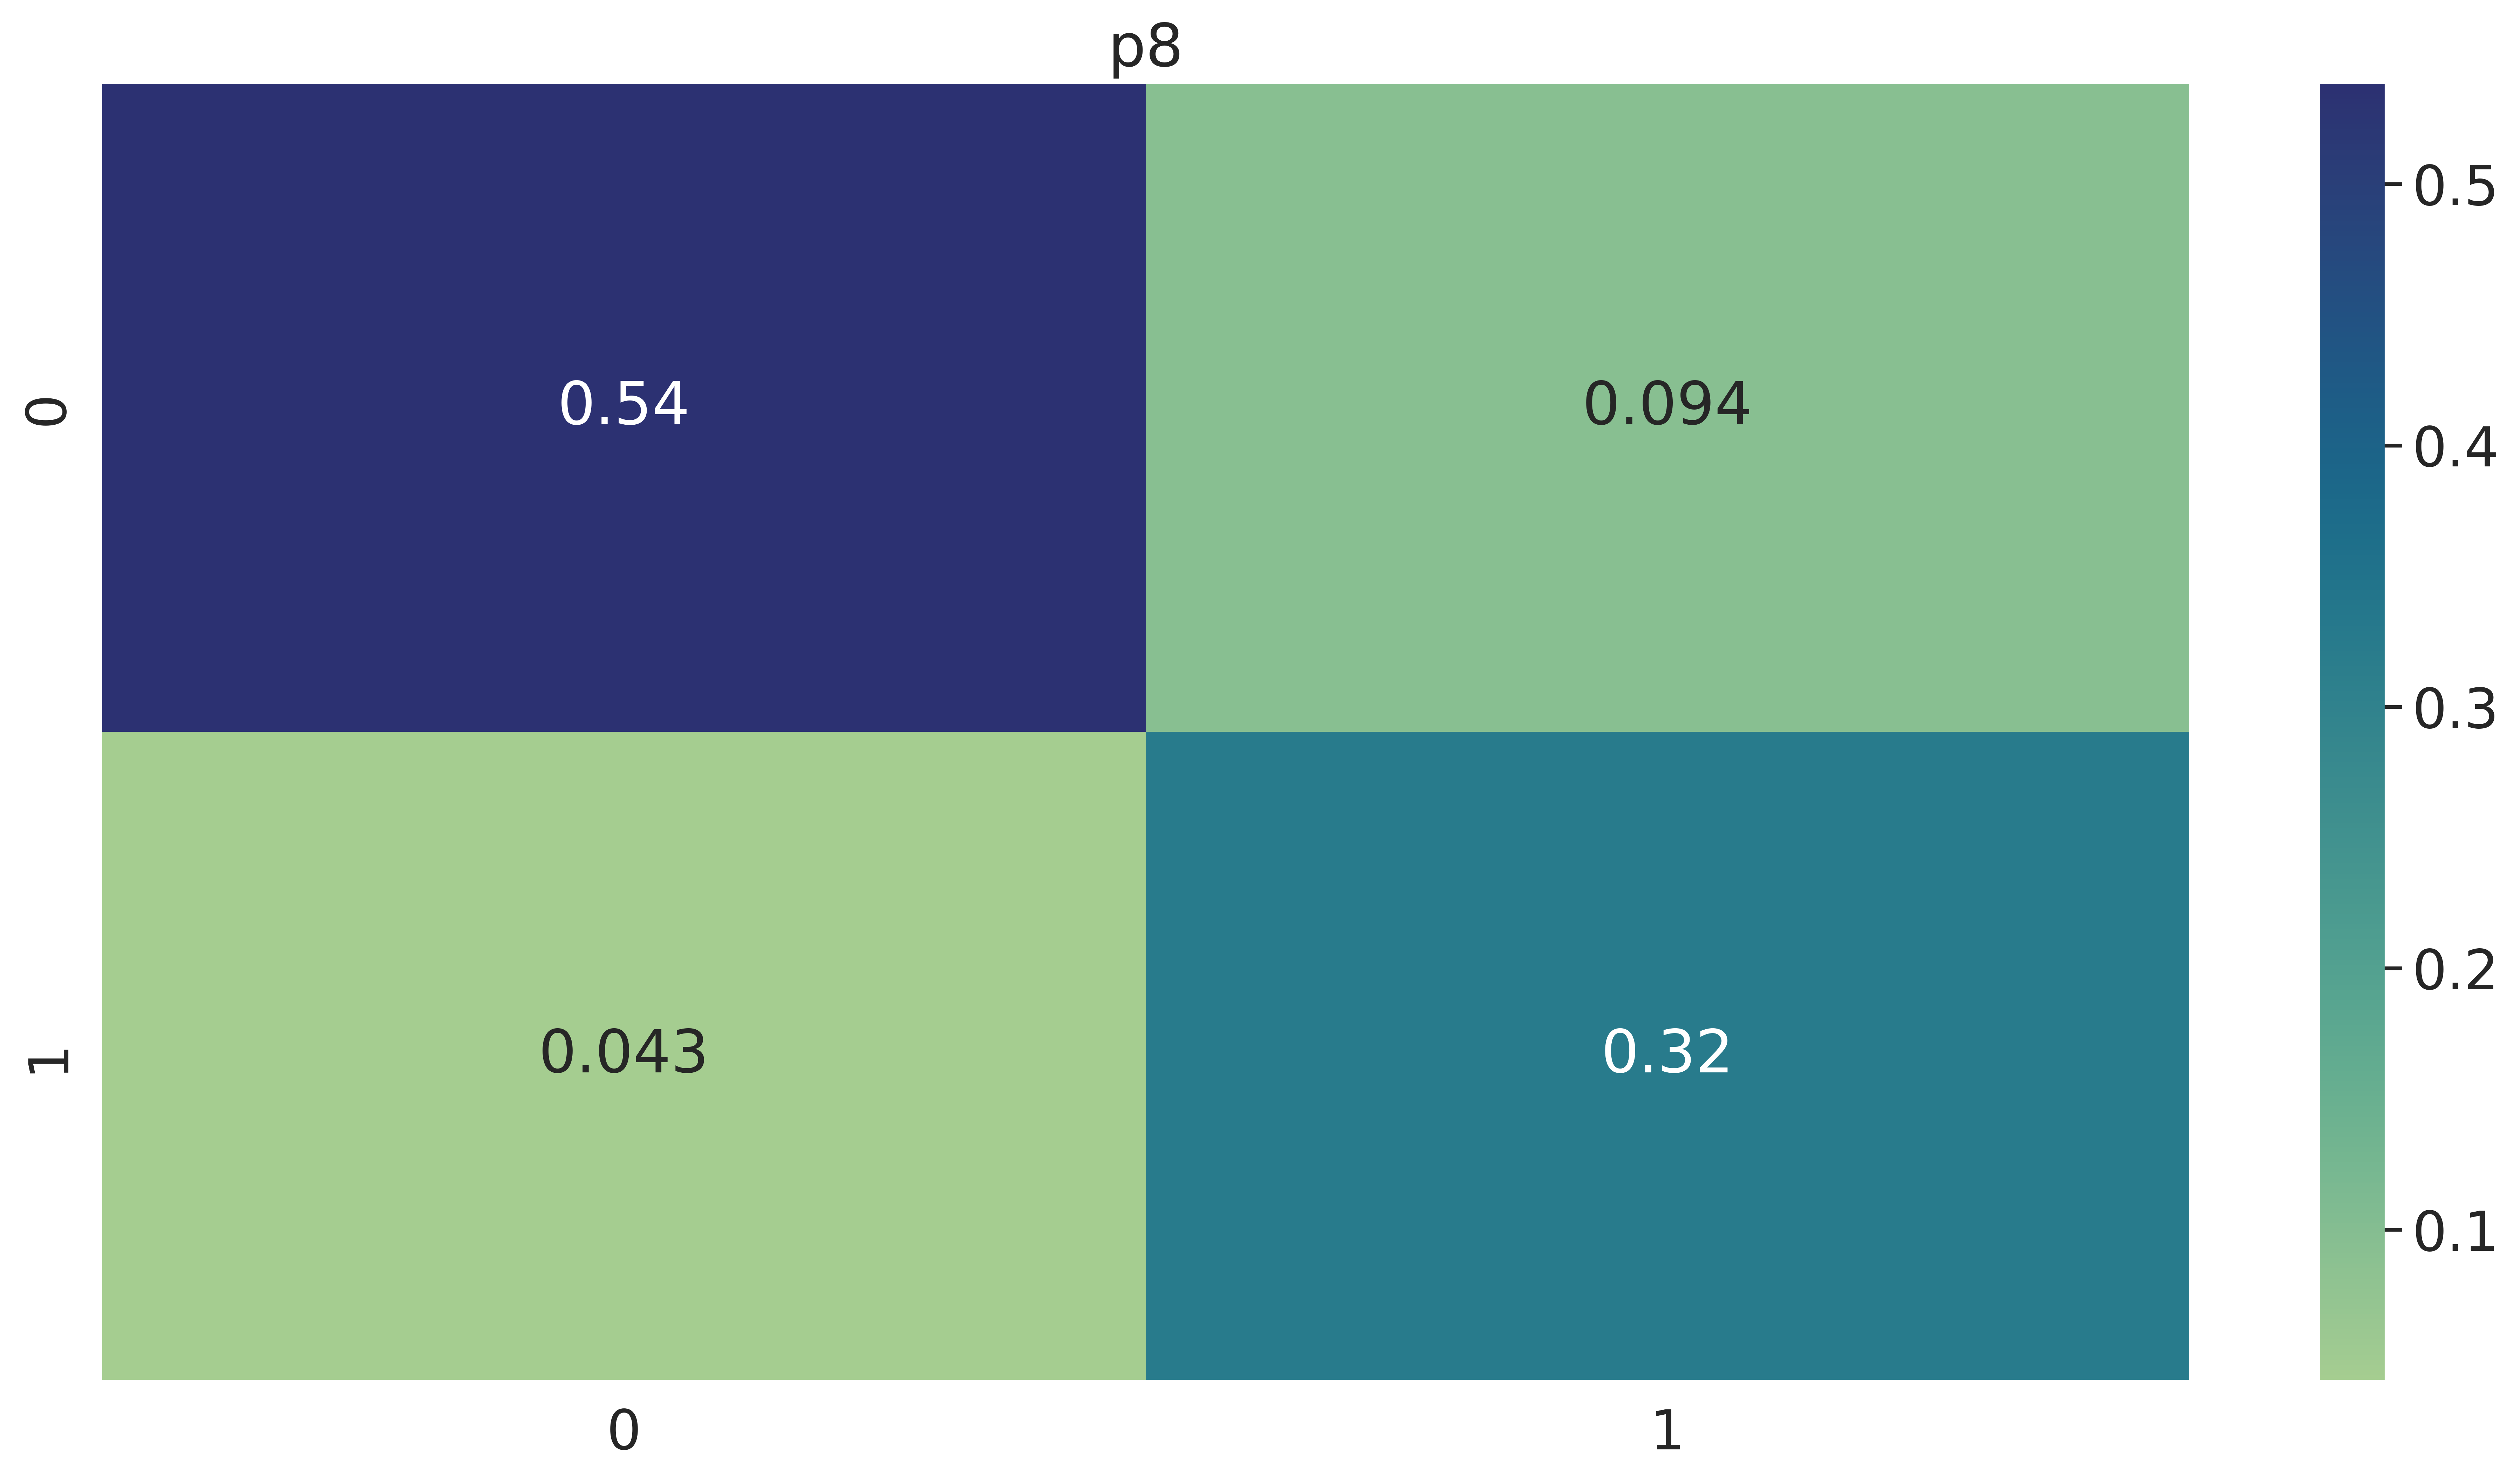

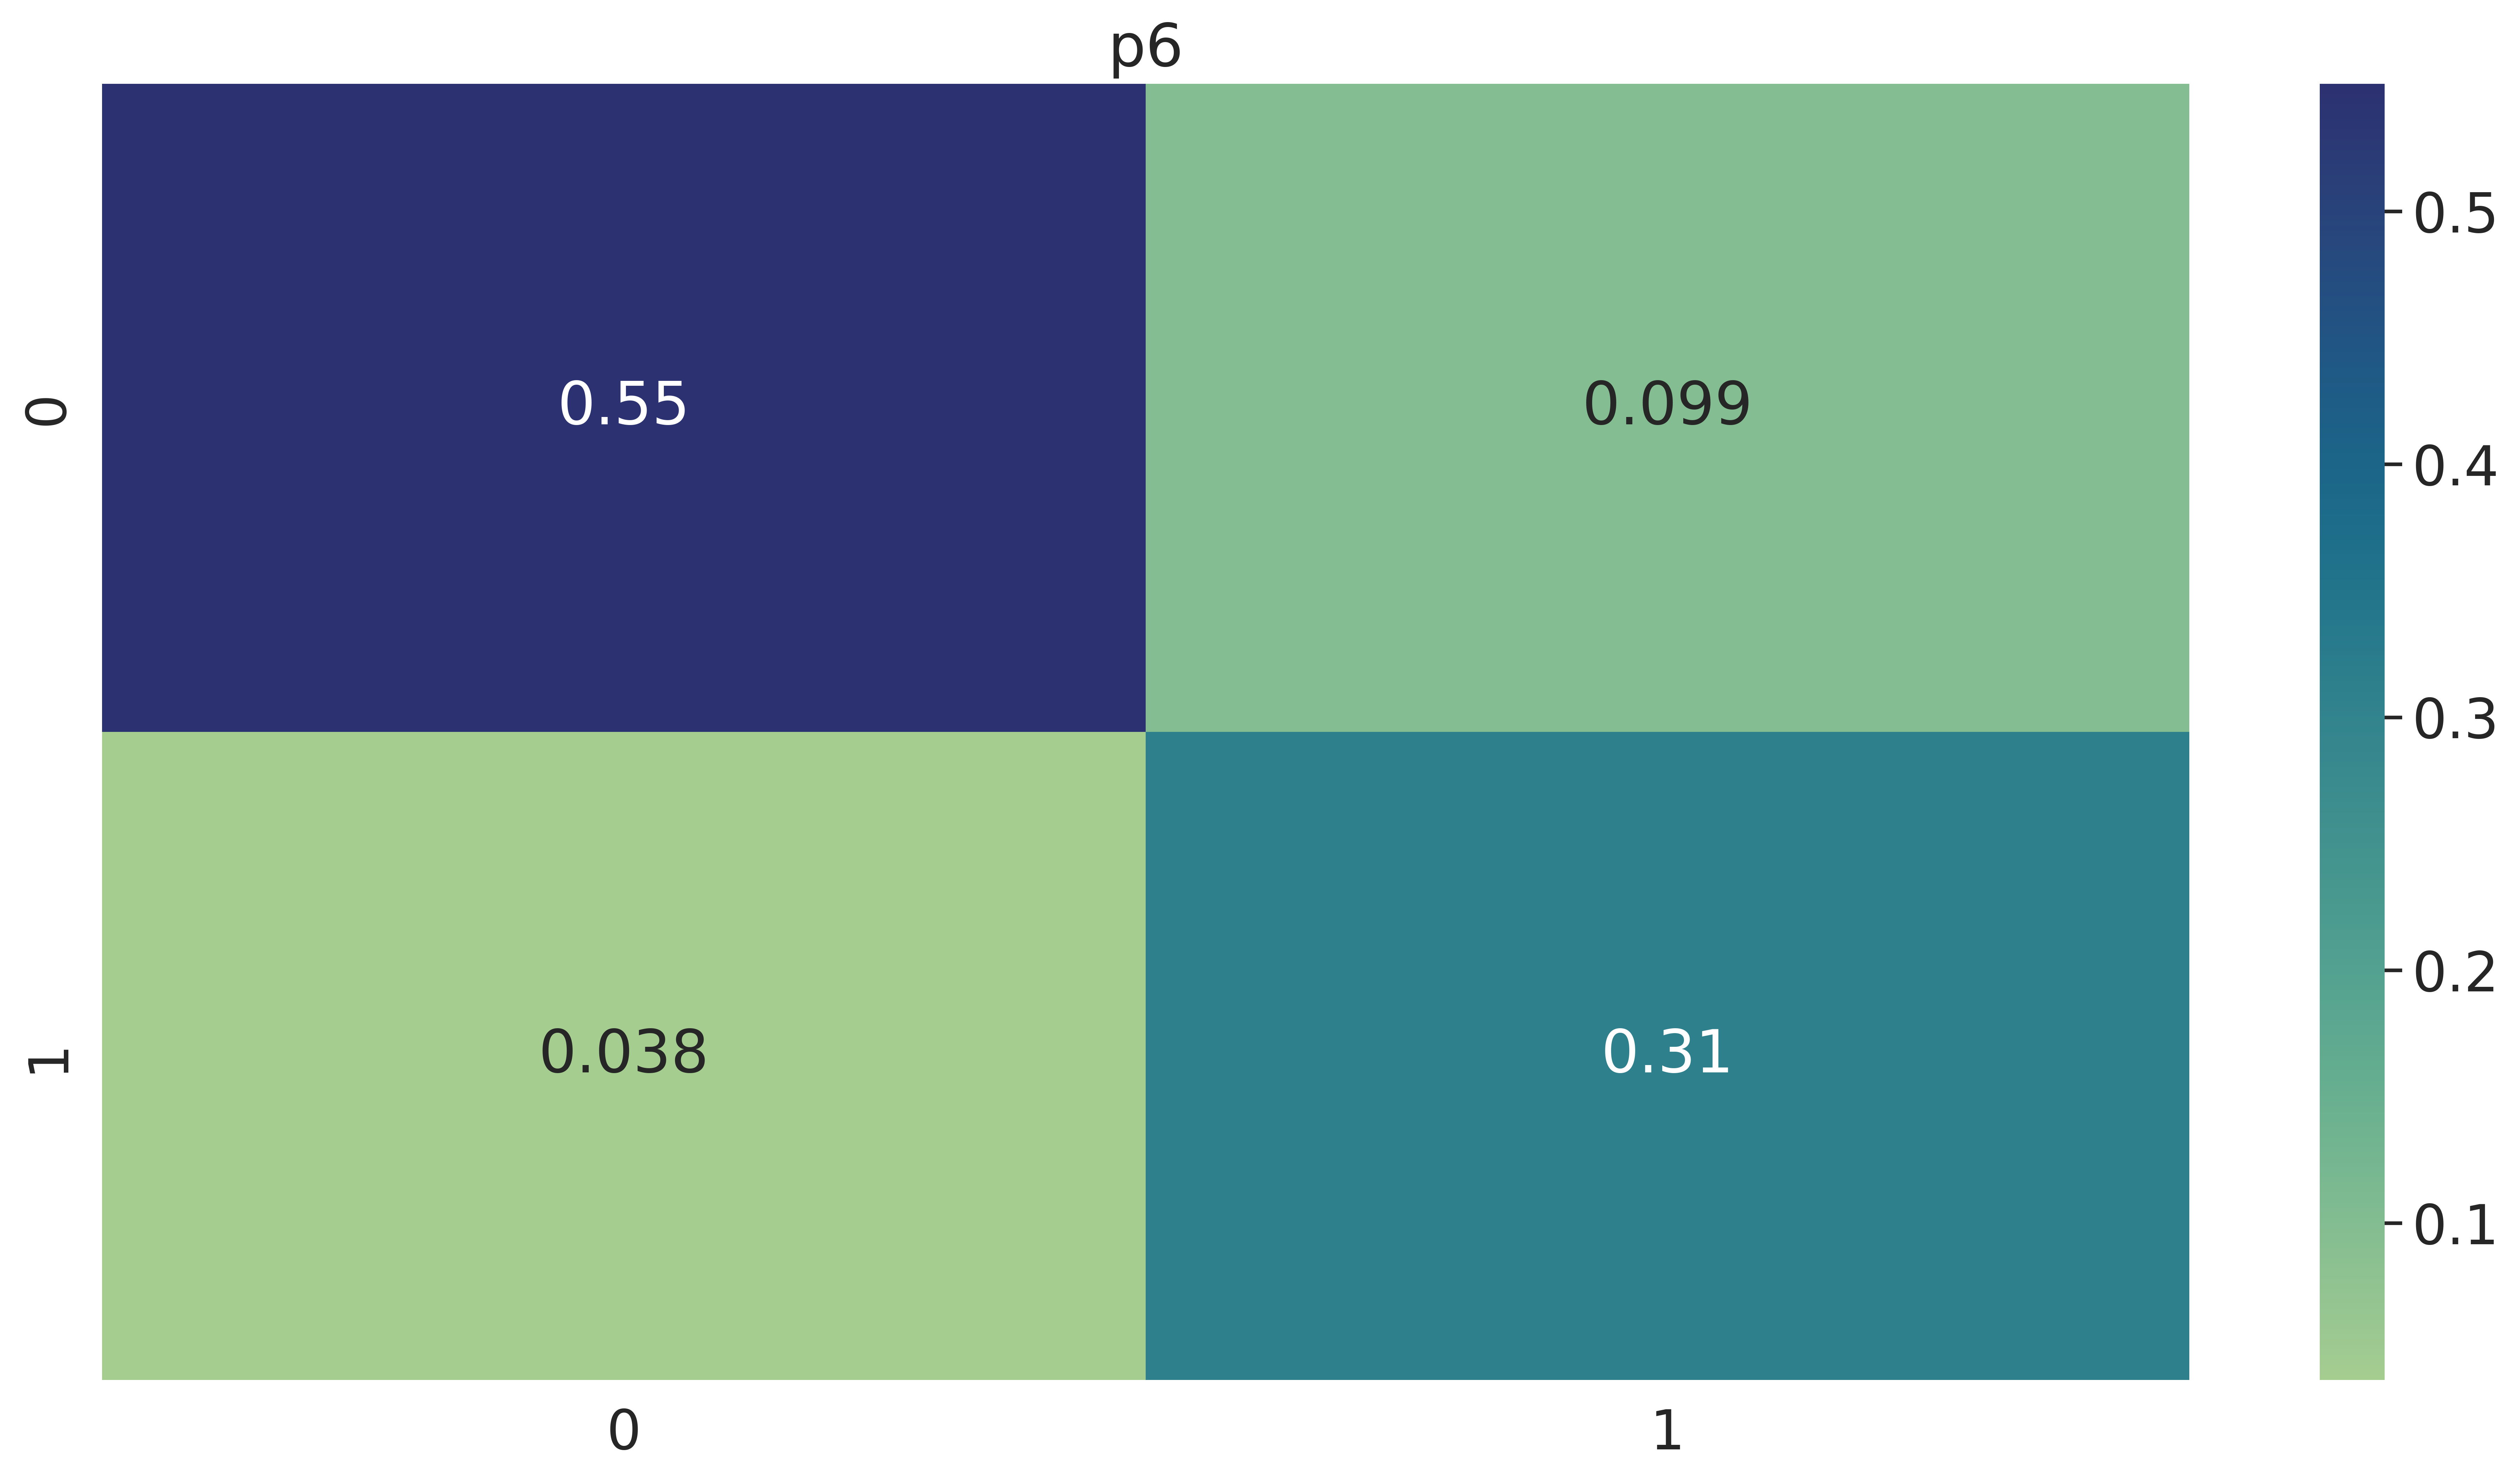

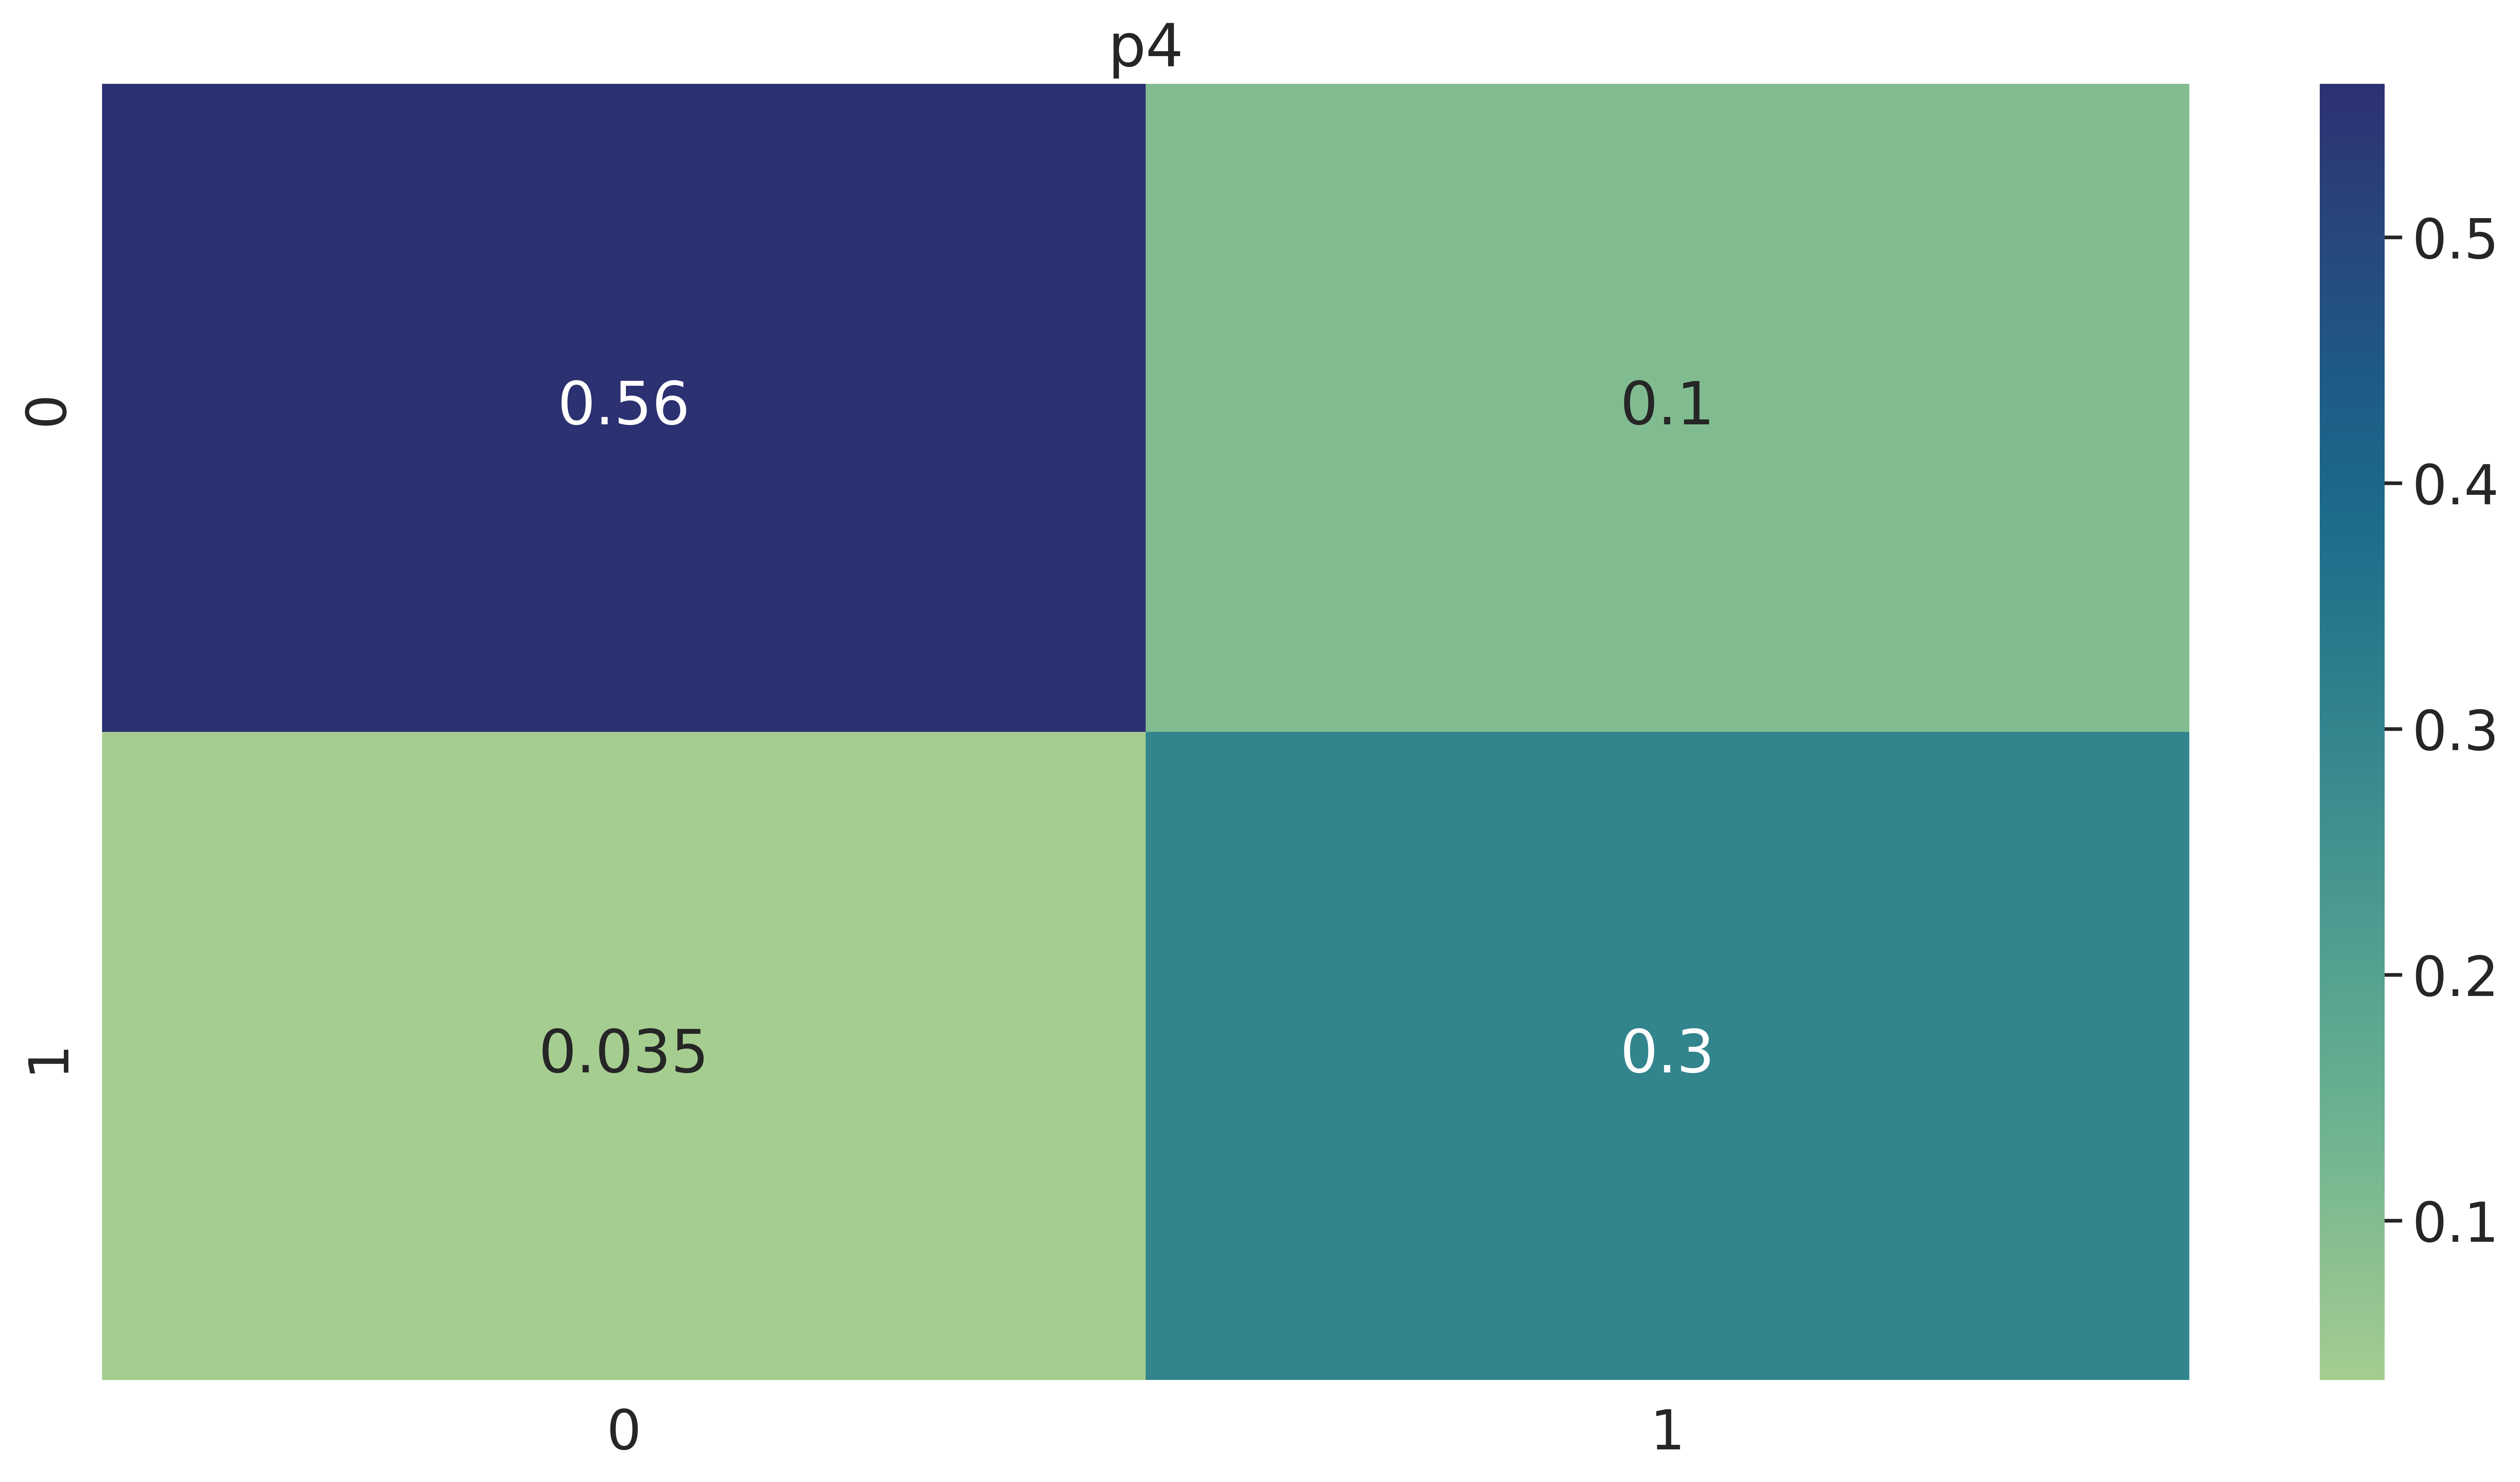

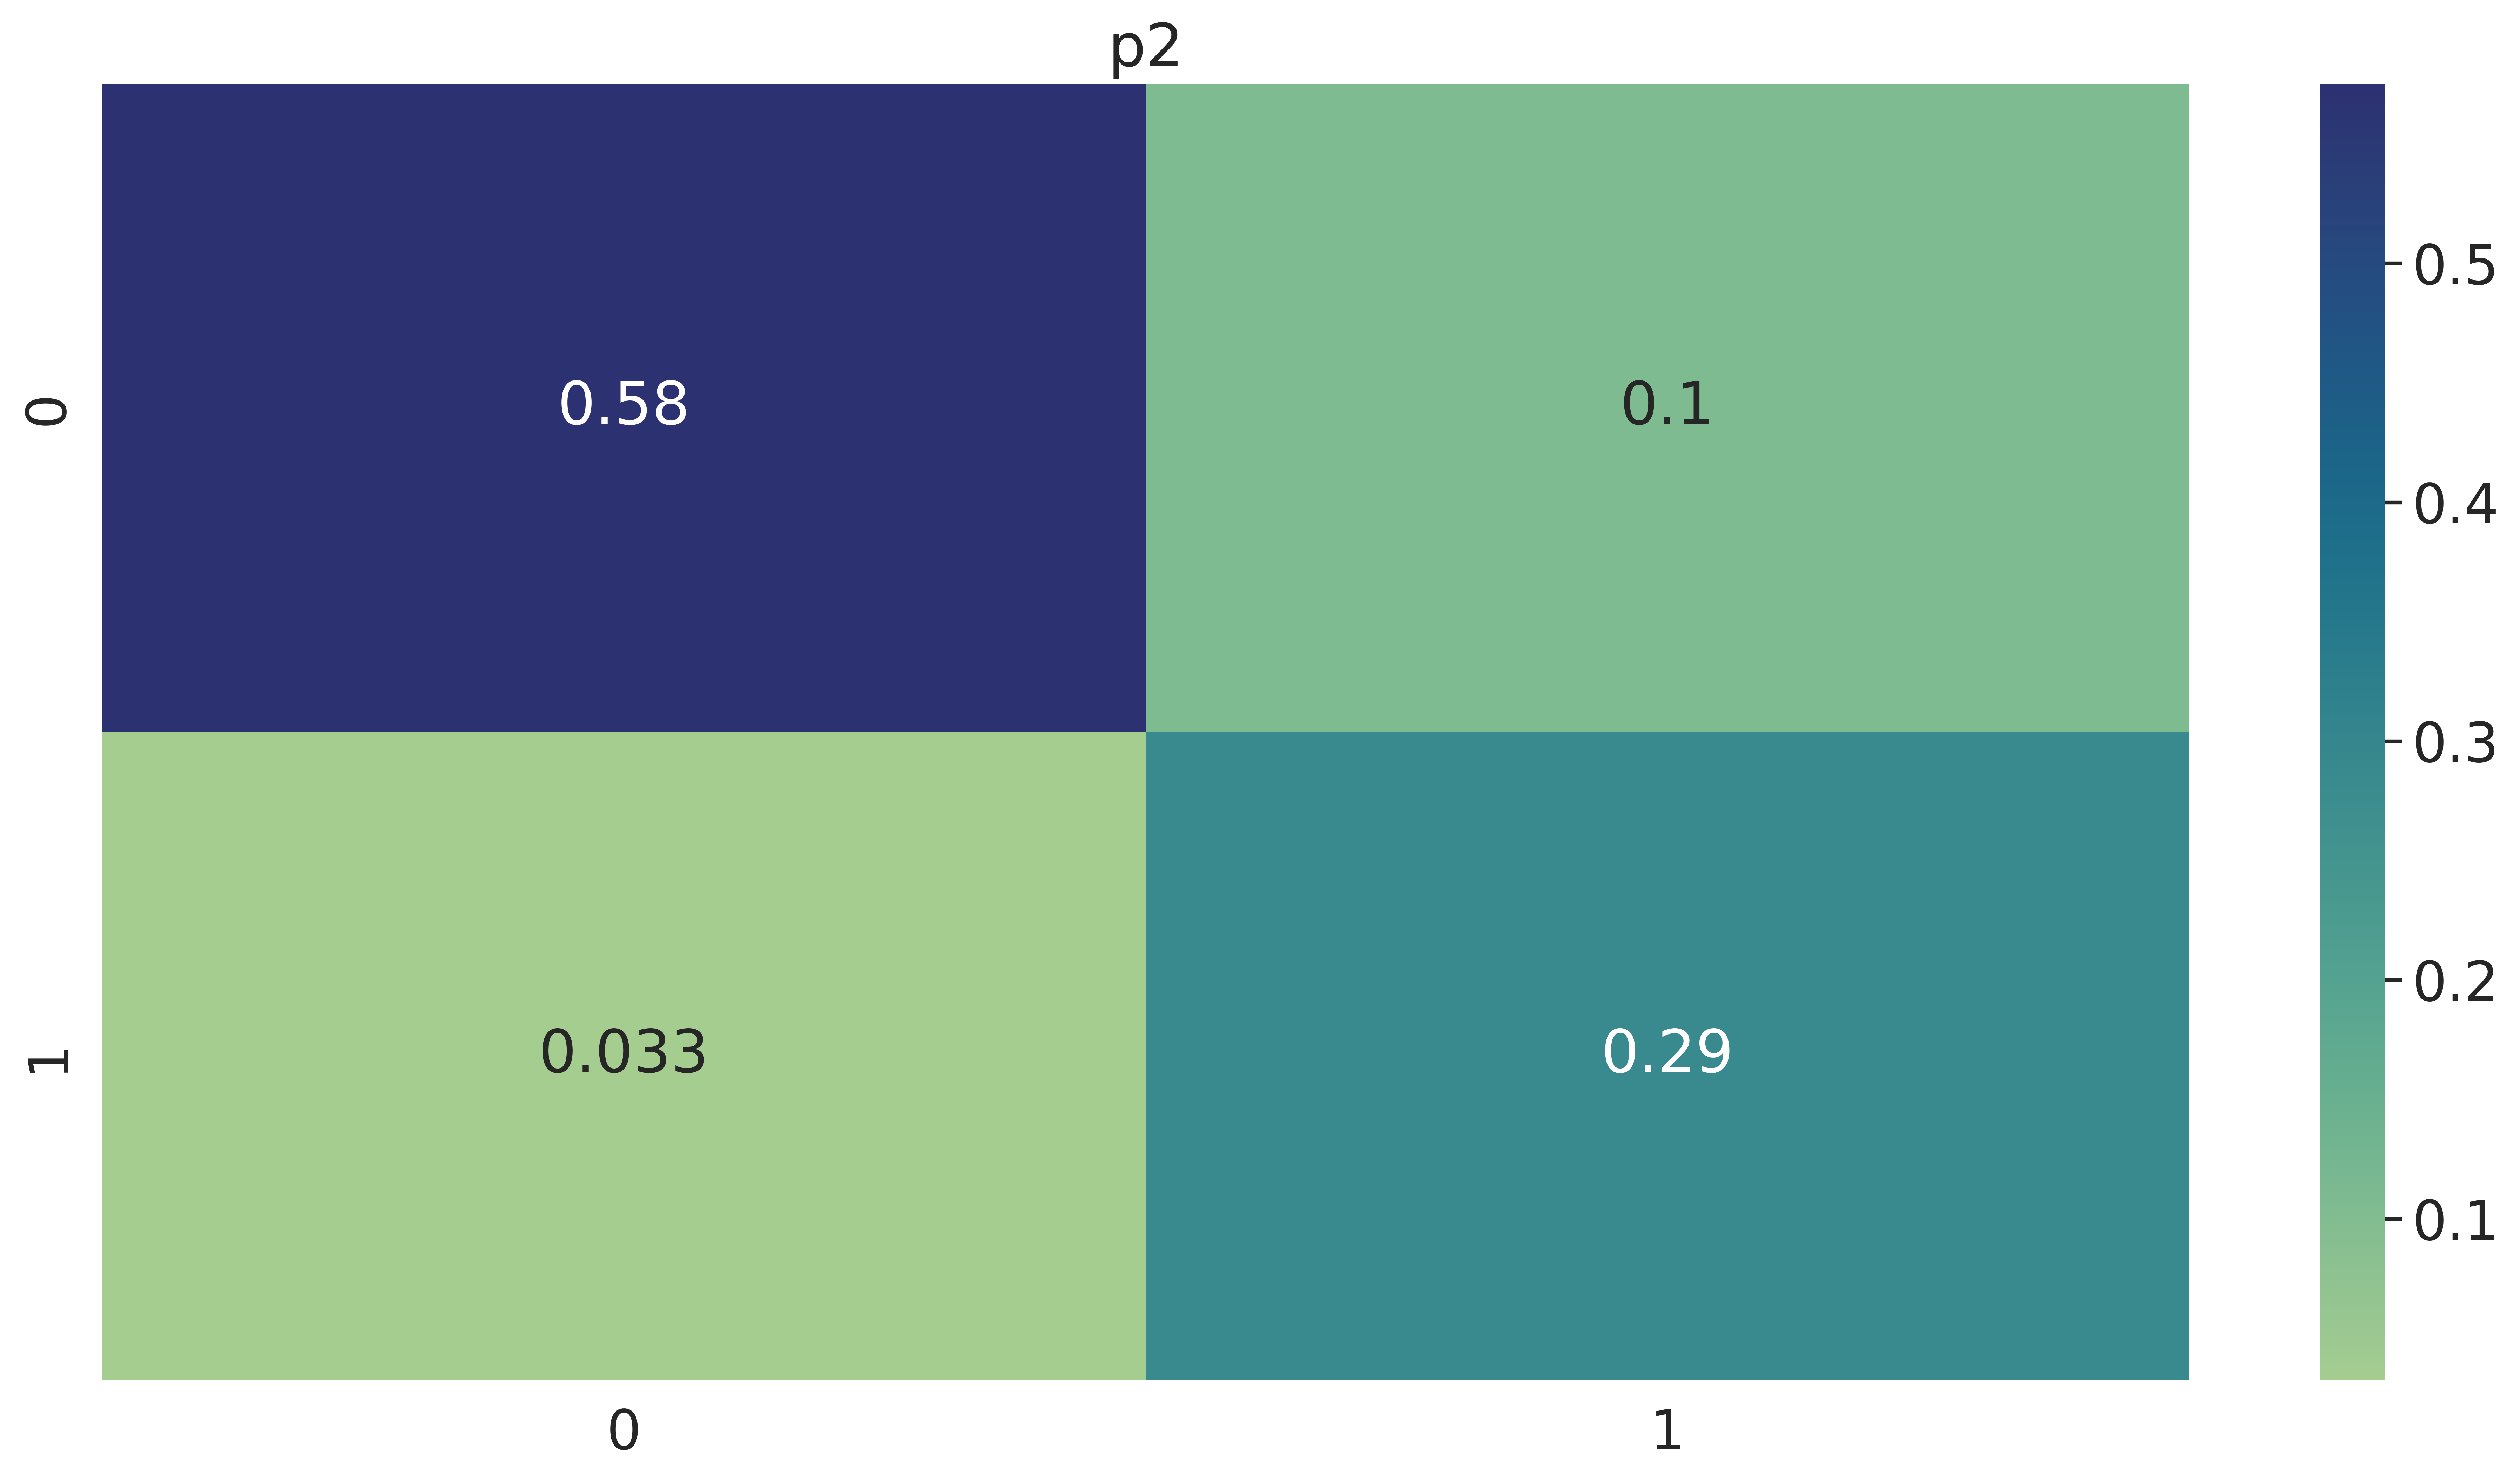

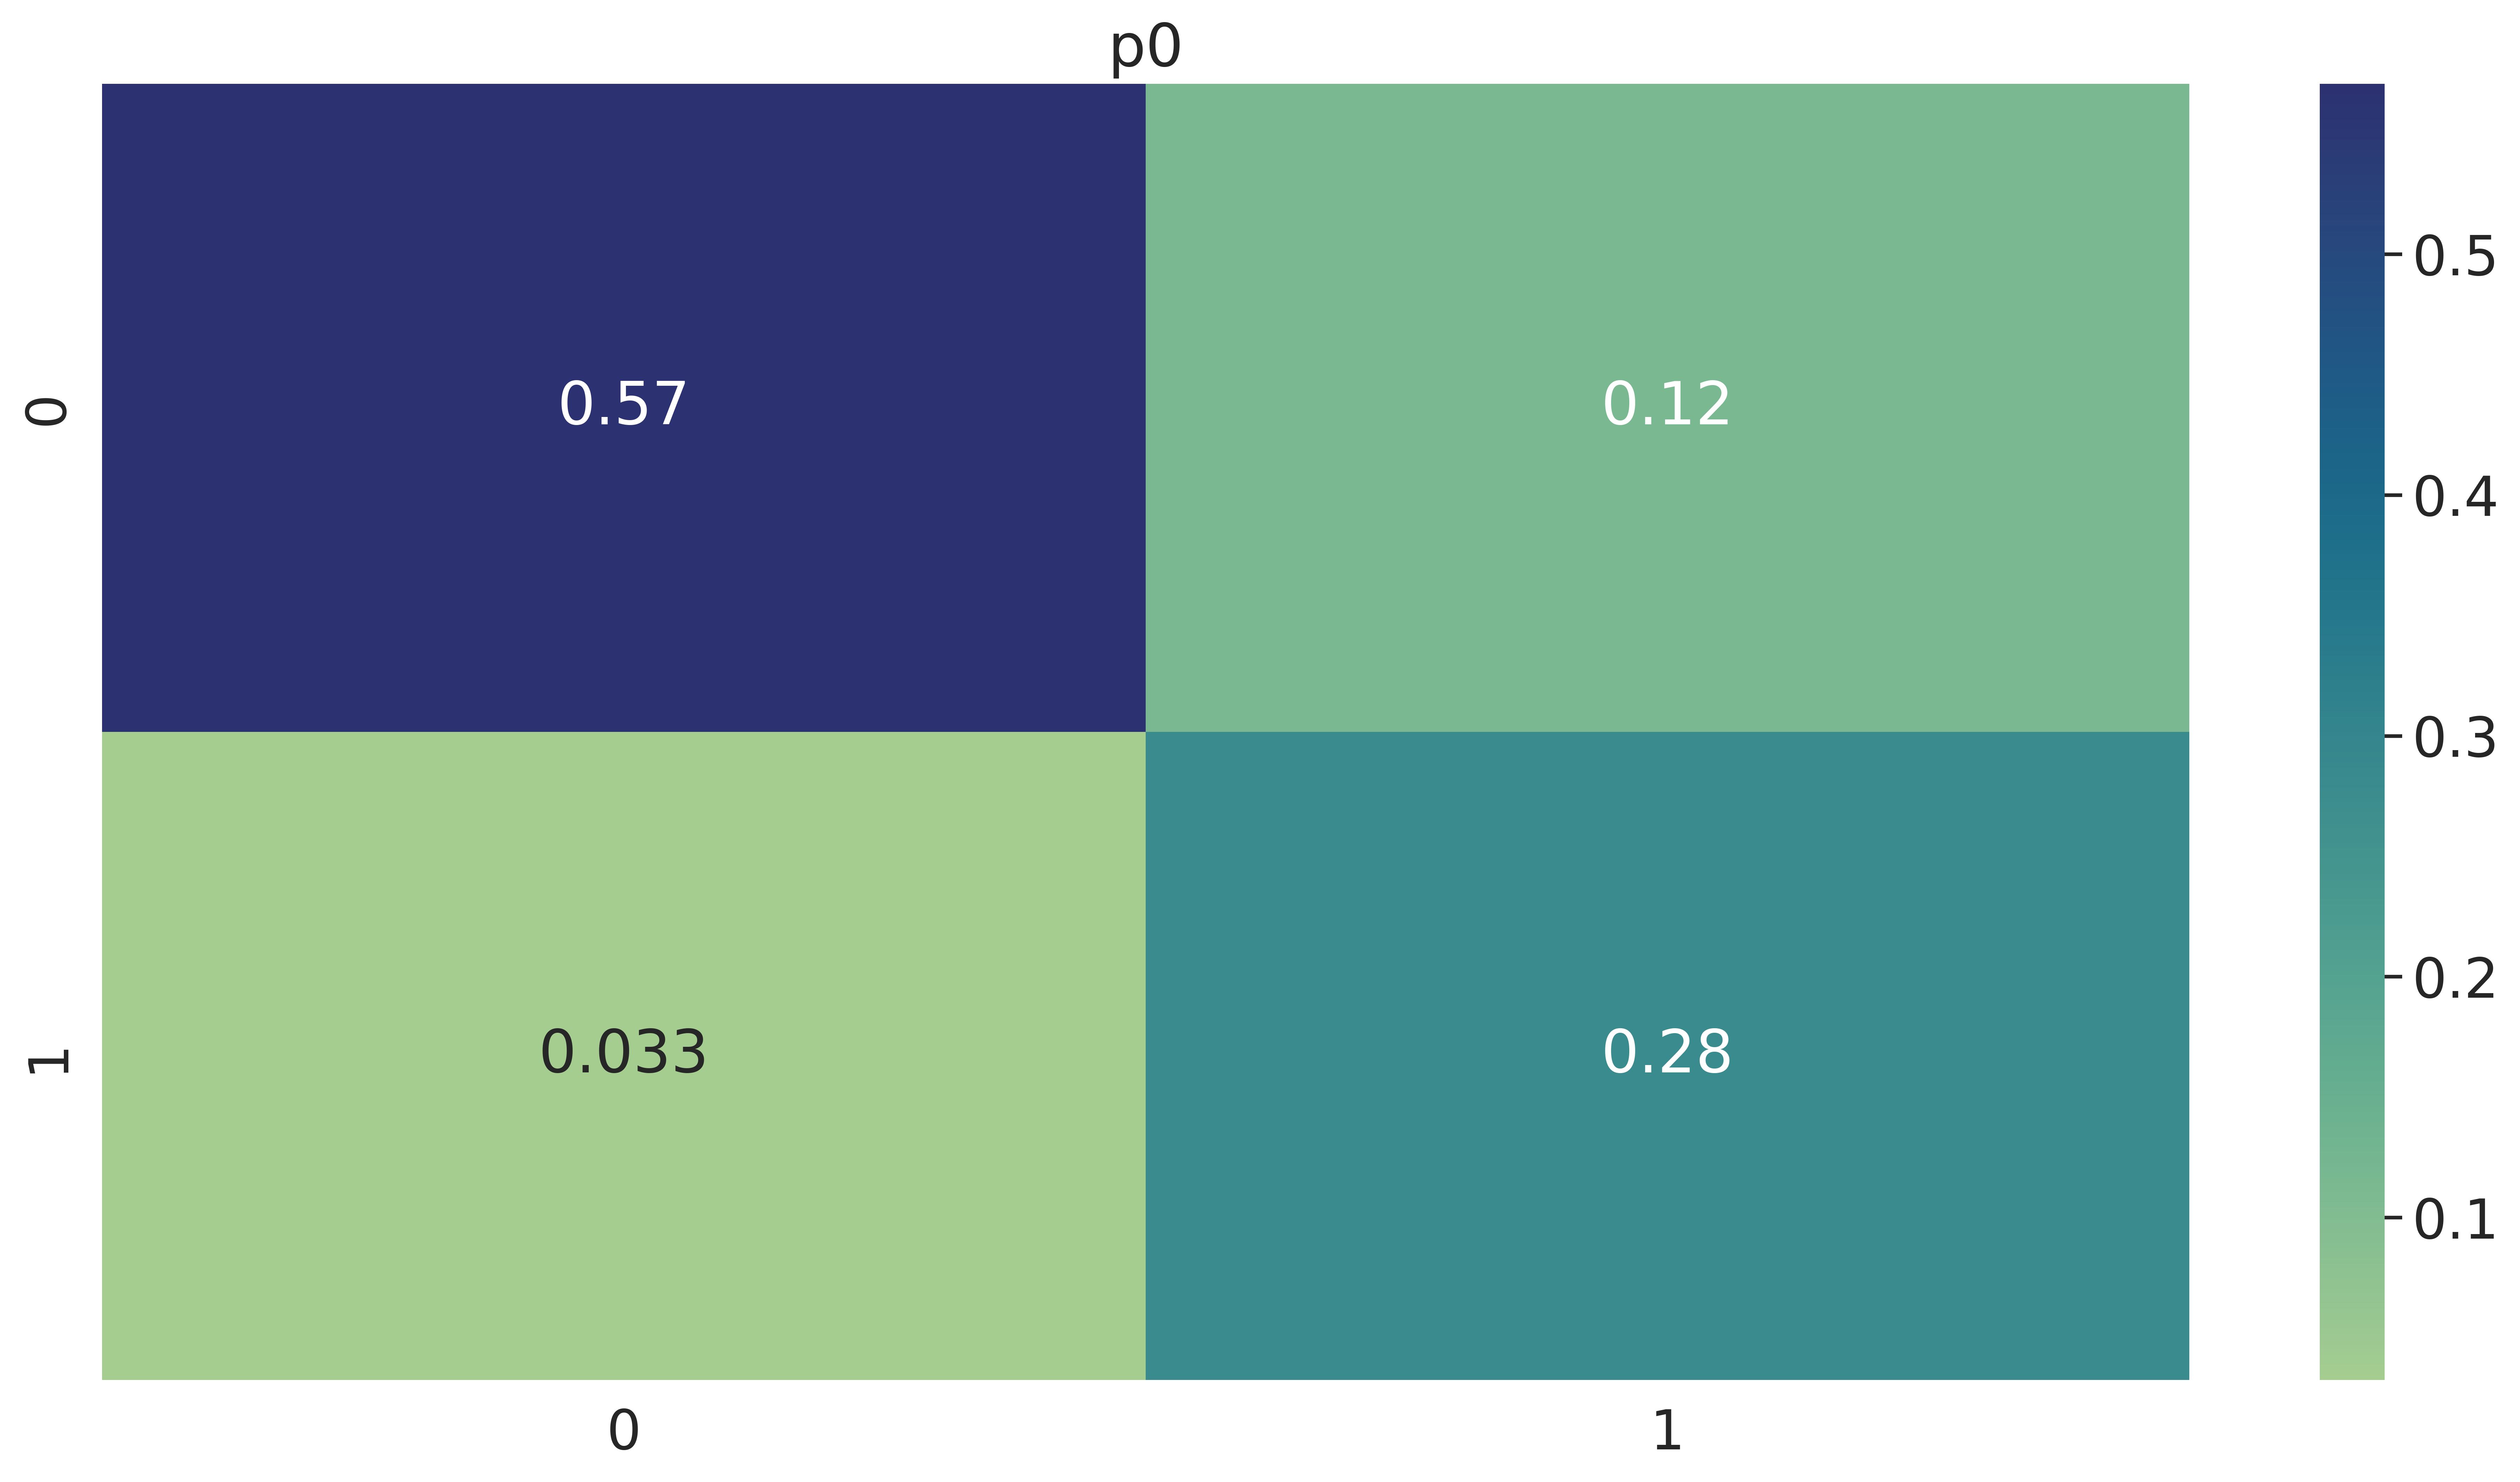

In [26]:
for experiment in experiments:
    df = specialists.query(f"experiment == '{experiment}'")
    tp_mean = df.specialist_tp.mean()
    tp_std = df.specialist_tp.std()
    fp_mean = df.specialist_fp.mean()
    fp_std = df.specialist_fp.std()
    fn_mean = df.specialist_fn.mean()
    fn_std = df.specialist_fn.std()
    tn_mean = df.specialist_tn.mean()
    tn_std = df.specialist_tn.std()

    m = [
        [tp_mean/100, fn_mean/100],
        [fp_mean/100, tn_mean/100]
    ]

    plt.figure(dpi=600)
    sns.heatmap(m, cmap="crest", annot=True)
    plt.title(experiment)
    plt.show()